In [1]:
### Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

import os

In [2]:
### Make sure that 'ggplot' style is used for all plots
plt.style.use('ggplot')
# plt.style.available ### To view all other available styles

In [3]:
### Set Working Directory (WD)
os.chdir('/Volumes/GoogleDrive/My Drive/CEMEX/Data Translators/GitHub/rgamerosl/capstone-project')

In [4]:
# ### How to import RDS (equivalent to RData) into pandas

# import rpy2.robjects as robjects
# from rpy2.robjects.packages import importr
# from rpy2.robjects import pandas2ri

# from rpy2.robjects.conversion import localconverter

# readRDS = robjects.r['readRDS']
# rdata = readRDS('dataset/Fuel_Data.RDS')

# with localconverter(robjects.default_converter + pandas2ri.converter):
#   pdata = robjects.conversion.rpy2py(rdata)

# print(pdata.info())
# display(pdata.head(5))

In [5]:
### Read the data
df = pd.read_csv("dataset/Fuel_Data.csv")
display(df)

,Date,Plate,Year_Model,Manufacturer,Zone,City,TurnOn,Idle_time,Fuel_used,Mileage,...,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H
0,2020-01-01,CR3570,2007.0,Kenworth,PAC,PUERTO VALLARTA,6,6.550000,42.0,0.879722,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN
1,2020-01-01,CR3739,2007.0,International,PAC,PUERTO VALLARTA,4,0.466667,15.0,0.501667,...,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,8.0
2,2020-01-01,CR3784,2007.0,International,PAC,MEXICALI,1,0.000000,NaN,4.585000,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,CR3920,2007.0,Kenworth,PAC,PUERTO VALLARTA,3,2.283333,28.0,0.262222,...,NaN,NaN,NaN,17.0,NaN,2.0,NaN,NaN,15.0,2.0
4,2020-01-01,CR4807,2018.0,Foton Daimler,CEN,PACHUCA,1,0.000000,NaN,0.273611,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445307,2020-12-31,CR5395,2020.0,Sinotruk,CEN,PACHUCA,4,0.889167,26.5,43.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445308,2020-12-31,CR5396,2020.0,Sinotruk,CEN,PACHUCA,0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445309,2020-12-31,CR5397,2020.0,Sinotruk,PAC,GUADALAJARA,4,2.621944,18.5,12.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
445310,2020-12-31,CR5398,2020.0,Sinotruk,CEN,PACHUCA,0,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445312 entries, 0 to 445311
Data columns (total 33 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Date                                                                                445312 non-null  object 
 1   Plate                                                                               445312 non-null  object 
 2   Year_Model                                                                          445308 non-null  float64
 3   Manufacturer                                                                        445308 non-null  object 
 4   Zone                                                                                445310 non-null  object 
 5   City                                                                                44

In [7]:
### Fill with 0 the NA for the different events
df.iloc[:,16:33] = df.iloc[:,16:33].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445312 entries, 0 to 445311
Data columns (total 33 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Date                                                                                445312 non-null  object 
 1   Plate                                                                               445312 non-null  object 
 2   Year_Model                                                                          445308 non-null  float64
 3   Manufacturer                                                                        445308 non-null  object 
 4   Zone                                                                                445310 non-null  object 
 5   City                                                                                44

In [8]:
display(df.head(10))

,Date,Plate,Year_Model,Manufacturer,Zone,City,TurnOn,Idle_time,Fuel_used,Mileage,...,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H
0,2020-01-01,CR3570,2007.0,Kenworth,PAC,PUERTO VALLARTA,6,6.550000,42.0,0.879722,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,2020-01-01,CR3739,2007.0,International,PAC,PUERTO VALLARTA,4,0.466667,15.0,0.501667,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0
2,2020-01-01,CR3784,2007.0,International,PAC,MEXICALI,1,0.000000,NaN,4.585000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-01,CR3920,2007.0,Kenworth,PAC,PUERTO VALLARTA,3,2.283333,28.0,0.262222,...,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,15.0,2.0
4,2020-01-01,CR4807,2018.0,Foton Daimler,CEN,PACHUCA,1,0.000000,NaN,0.273611,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2020-01-02,CR2389,2005.0,Kenworth,NOR,MONTERREY,5,3.883333,NaN,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2020-01-02,CR2526,2005.0,Kenworth,PAC,GUADALAJARA,2,0.416667,21.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2020-01-02,CR2584,2005.0,International,PAC,PUERTO VALLARTA,2,0.100000,1.0,5.100278,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
8,2020-01-02,CR2607,2005.0,International,NOR,COAHUILA NORTE,4,3.216667,27.0,0.085278,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
9,2020-01-02,CR2629,2005.0,International,CEN,QUERETARO,4,0.083333,2.0,2.900833,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [9]:
df0 = df.drop(['Date','Plate','City','Hrs_eff','Engine_hrs','Fuel_used','km_per_liter'], axis=1)
display(df0.head(10))

,Year_Model,Manufacturer,Zone,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,CEM - Pedal del acelerador arriba del 50% con vehículo detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,CEM- Motor en ralentí por más de 20 mins,CEM- RPM mayores a 1900,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H
0,2007.0,Kenworth,PAC,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0
1,2007.0,International,PAC,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,8.0
2,2007.0,International,PAC,1,0.000000,4.585000,0.00,NaN,2,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007.0,Kenworth,PAC,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,17.0,0.0,2.0,0.0,0.0,15.0,2.0
4,2018.0,Foton Daimler,CEN,1,0.000000,0.273611,0.00,NaN,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005.0,Kenworth,NOR,5,3.883333,0.000000,8.97,NaN,3,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005.0,Kenworth,PAC,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2005.0,International,PAC,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
8,2005.0,International,NOR,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0
9,2005.0,International,CEN,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


In [10]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445312 entries, 0 to 445311
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          445308 non-null  float64
 1   Manufacturer                                                                        445308 non-null  object 
 2   Zone                                                                                445310 non-null  object 
 3   TurnOn                                                                              445312 non-null  int64  
 4   Idle_time                                                                           445312 non-null  float64
 5   Mileage                                                                             42

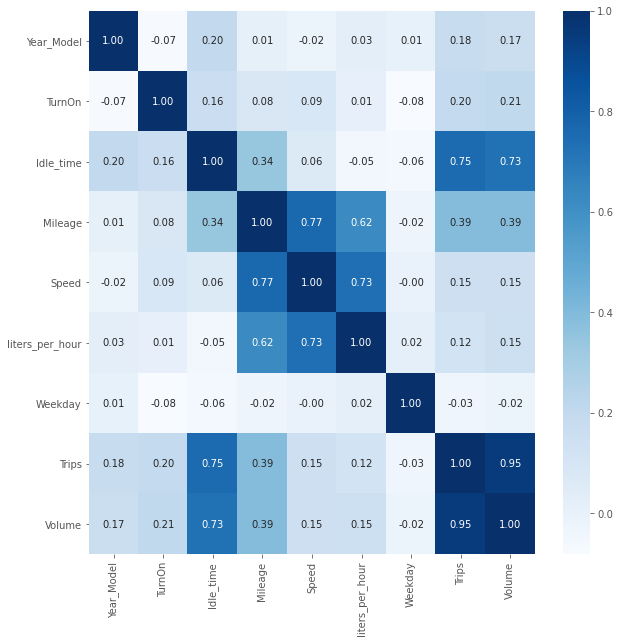

In [11]:
fig = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df0.iloc[:,0:11].corr(), annot=True, fmt='0.2f', cmap='Blues')
plt.yticks(rotation=0)
# plt.savefig(f'figures/correlations1.png')
plt.show()

### Since Speed and mileage seems to be closely related, probably I should only keep one of them. Sam thing for Trips and Volume

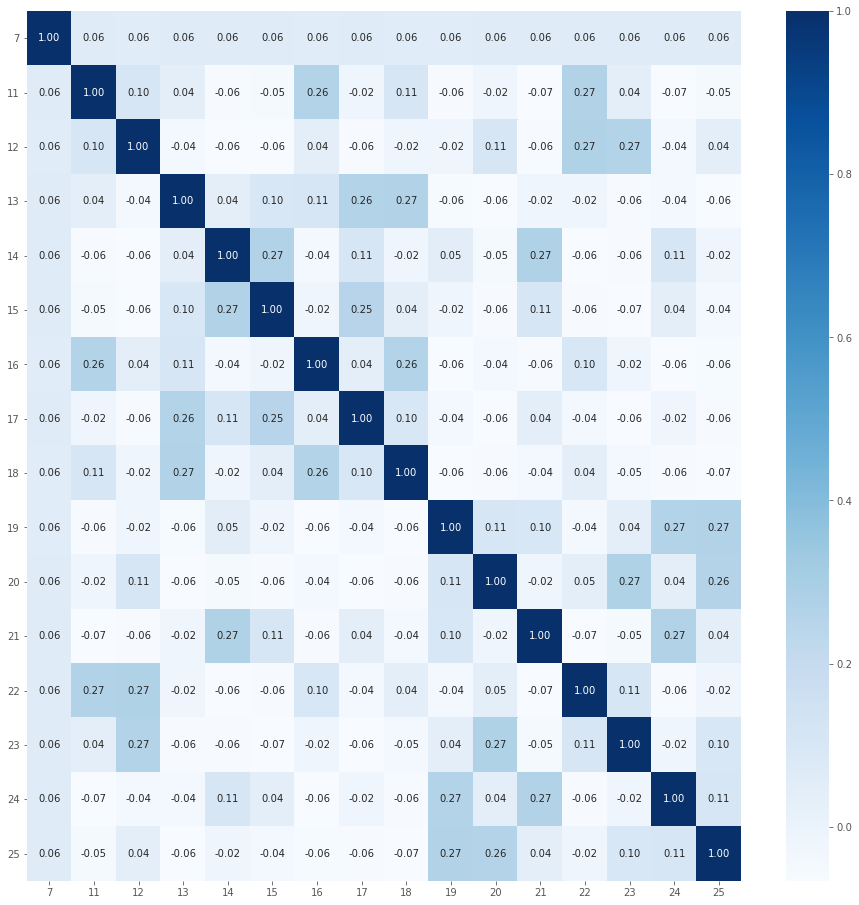

In [12]:
subset = [7,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]
fig = plt.subplots(figsize=(16,16))
ax = sns.heatmap(df0.iloc[:,subset].corr(), annot=True, fmt='0.2f', cmap='Blues',xticklabels=subset,yticklabels=subset)
plt.yticks(rotation=0)
# plt.savefig(f'figures/correlations2.png')
plt.show()

In [13]:
df1 = df0.dropna(subset=['liters_per_hour'])
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418905 entries, 0 to 418904
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          418905 non-null  float64
 1   Manufacturer                                                                        418905 non-null  object 
 2   Zone                                                                                418905 non-null  object 
 3   TurnOn                                                                              418905 non-null  int64  
 4   Idle_time                                                                           418905 non-null  float64
 5   Mileage                                                                             40

In [23]:
### Drop entries with counting larger than 100 events per day
for i in df1.columns[11:26]:
    indexHighEvents = df1.loc[df1[str(i)] > 100,].index
    df1.drop(indexHighEvents,inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417346 entries, 0 to 418904
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          417346 non-null  float64
 1   Manufacturer                                                                        417346 non-null  object 
 2   Zone                                                                                417346 non-null  object 
 3   TurnOn                                                                              417346 non-null  int64  
 4   Idle_time                                                                           417346 non-null  float64
 5   Mileage                                                                             40

In [49]:
df1.reset_index(inplace=True)
df1.drop('index',axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 26 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          417346 non-null  float64
 1   Manufacturer                                                                        417346 non-null  object 
 2   Zone                                                                                417346 non-null  object 
 3   TurnOn                                                                              417346 non-null  int64  
 4   Idle_time                                                                           417346 non-null  float64
 5   Mileage                                                                             40

In [50]:
# df1.to_excel('dataset/data_v2.xlsx',index=False)

In [51]:
oe_manufacturer = OneHotEncoder()
oe_results_m = oe_manufacturer.fit_transform(df1[['Manufacturer']])
manufacturer_ohe = pd.DataFrame(oe_results_m.toarray(), columns=oe_manufacturer.categories_)
print(display(manufacturer_ohe.head(10)))
manufacturer_ohe.columns=np.array(oe_manufacturer.categories_).flatten()
manufacturer_ohe.info()

,Foton Daimler,Freightliner,International,Kenworth,Sinotruk
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0
9,0.0,0.0,1.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Foton Daimler  417346 non-null  float64
 1   Freightliner   417346 non-null  float64
 2   International  417346 non-null  float64
 3   Kenworth       417346 non-null  float64
 4   Sinotruk       417346 non-null  float64
dtypes: float64(5)
memory usage: 15.9 MB


In [52]:
df2 = df1.join(manufacturer_ohe)
### Drop column for Kenworth, before droping it the 29 column corresponded to the manufacturer Kenworth
df2.drop(df2.columns[29],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,Zone,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,CEM- Sobrerevolucionado- RPM mayores a 2200,CEM-Aceleracion inmediata despues de encender el motor,ISG11 350 - High engine speed in low torque (After green zone),ISG11 350 - High engine torque in low rpm (before the green zone),ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec,Over Speed - Above 80 KM/H,Foton Daimler,Freightliner,International,Sinotruk
0,2007.0,Kenworth,PAC,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007.0,International,PAC,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,1.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,1.0,0.0
2,2007.0,Kenworth,PAC,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,2.0,0.0,0.0,15.0,2.0,0.0,0.0,0.0,0.0
3,2005.0,Kenworth,PAC,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005.0,International,PAC,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2005.0,International,NOR,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
6,2005.0,International,CEN,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,2005.0,International,PAC,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2005.0,Kenworth,SUR,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2006.0,International,NOR,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 30 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          417346 non-null  float64
 1   Manufacturer                                                                        417346 non-null  object 
 2   Zone                                                                                417346 non-null  object 
 3   TurnOn                                                                              417346 non-null  int64  
 4   Idle_time                                                                           417346 non-null  float64
 5   Mileage                                                                          

In [53]:
### Weekdays (0: Monday to 6: Sunday)
oe_weekday = OneHotEncoder()
oe_results_w = oe_weekday.fit_transform(df2[['Weekday']])
weekday_ohe = pd.DataFrame(oe_results_w.toarray(), columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
print(display(weekday_ohe.head(10)))
weekday_ohe.columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
weekday_ohe.info()

,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Monday     417346 non-null  float64
 1   Tuesday    417346 non-null  float64
 2   Wednesday  417346 non-null  float64
 3   Thursday   417346 non-null  float64
 4   Friday     417346 non-null  float64
 5   Saturday   417346 non-null  float64
 6   Sunday     417346 non-null  float64
dtypes: float64(7)
memory usage: 22.3 MB


In [54]:
df2 = df2.join(weekday_ohe)
### Drop column for Friday, before droping it the 34 column corresponded to the label Friday
df2.drop(df2.columns[34],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,Zone,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,Foton Daimler,Freightliner,International,Sinotruk,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday
0,2007.0,Kenworth,PAC,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2007.0,International,PAC,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2007.0,Kenworth,PAC,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2005.0,Kenworth,PAC,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2005.0,International,PAC,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,2005.0,International,NOR,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2005.0,International,CEN,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,2005.0,International,PAC,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,2005.0,Kenworth,SUR,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,2006.0,International,NOR,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 36 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          417346 non-null  float64
 1   Manufacturer                                                                        417346 non-null  object 
 2   Zone                                                                                417346 non-null  object 
 3   TurnOn                                                                              417346 non-null  int64  
 4   Idle_time                                                                           417346 non-null  float64
 5   Mileage                                                                          

In [55]:
oe_zone = OneHotEncoder()
oe_results_z = oe_zone.fit_transform(df2[['Zone']])
zone_ohe = pd.DataFrame(oe_results_z.toarray(), columns=oe_zone.categories_)
print(display(zone_ohe.head(10)))
zone_ohe.columns=np.array(oe_zone.categories_).flatten()
zone_ohe.info()

,CEN,NOR,PAC,PAV,SUR
0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   CEN     417346 non-null  float64
 1   NOR     417346 non-null  float64
 2   PAC     417346 non-null  float64
 3   PAV     417346 non-null  float64
 4   SUR     417346 non-null  float64
dtypes: float64(5)
memory usage: 15.9 MB


In [56]:
df2 = df2.join(zone_ohe)
### Drop column for PAV, before droping it the 39 column corresponded to the label PAV (Pavimentos)
df2.drop(df2.columns[39],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,Zone,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,Monday,Tuesday,Wednesday,Thursday,Saturday,Sunday,CEN,NOR,PAC,SUR
0,2007.0,Kenworth,PAC,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2007.0,International,PAC,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2007.0,Kenworth,PAC,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2005.0,Kenworth,PAC,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,2005.0,International,PAC,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2005.0,International,NOR,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,2005.0,International,CEN,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7,2005.0,International,PAC,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,2005.0,Kenworth,SUR,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
9,2006.0,International,NOR,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 40 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          417346 non-null  float64
 1   Manufacturer                                                                        417346 non-null  object 
 2   Zone                                                                                417346 non-null  object 
 3   TurnOn                                                                              417346 non-null  int64  
 4   Idle_time                                                                           417346 non-null  float64
 5   Mileage                                                                          

In [57]:
oe_year = OneHotEncoder()
oe_results_y = oe_year.fit_transform(df2[['Year_Model']])
year_ohe = pd.DataFrame(oe_results_y.toarray(), columns=oe_year.categories_)
print(display(year_ohe.head(10)))
year_ohe.columns=['2005','2006','2007','2008','2013','2014','2017','2018','2019','2020']
year_ohe.info()

,2005.0,2006.0,2007.0,2008.0,2013.0,2014.0,2017.0,2018.0,2019.0,2020.0
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   2005    417346 non-null  float64
 1   2006    417346 non-null  float64
 2   2007    417346 non-null  float64
 3   2008    417346 non-null  float64
 4   2013    417346 non-null  float64
 5   2014    417346 non-null  float64
 6   2017    417346 non-null  float64
 7   2018    417346 non-null  float64
 8   2019    417346 non-null  float64
 9   2020    417346 non-null  float64
dtypes: float64(10)
memory usage: 31.8 MB


In [58]:
df2 = df2.join(year_ohe)
### Drop column for 2007, before droping it the 42 column corresponded to the label 2007 (Pavimentos)
df2.drop(df2.columns[42],axis=1,inplace=True)
print(display(df2.head(10)))
df2.info()

,Year_Model,Manufacturer,Zone,TurnOn,Idle_time,Mileage,Speed,liters_per_hour,Weekday,Trips,...,SUR,2005,2006,2008,2013,2014,2017,2018,2019,2020
0,2007.0,Kenworth,PAC,6,6.550000,0.879722,2.30,5.283019,2,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007.0,International,PAC,4,0.466667,0.501667,25.55,8.035714,2,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007.0,Kenworth,PAC,3,2.283333,0.262222,12.27,7.962085,2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2005.0,Kenworth,PAC,2,0.416667,0.000000,9.53,5.185185,3,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2005.0,International,PAC,2,0.100000,5.100278,0.30,7.500000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2005.0,International,NOR,4,3.216667,0.085278,5.68,6.377953,3,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2005.0,International,CEN,4,0.083333,2.900833,1.02,12.000000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2005.0,International,PAC,2,0.183333,2.501944,0.00,5.000000,3,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2005.0,Kenworth,SUR,4,6.533333,6.558056,5.49,4.714286,3,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2006.0,International,NOR,6,1.150000,1.374444,0.00,4.109589,3,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 49 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Year_Model                                                                          417346 non-null  float64
 1   Manufacturer                                                                        417346 non-null  object 
 2   Zone                                                                                417346 non-null  object 
 3   TurnOn                                                                              417346 non-null  int64  
 4   Idle_time                                                                           417346 non-null  float64
 5   Mileage                                                                          

In [ ]:
# ### Another approach to categorical/indicator variables using get_dummiyes properly
# import pandas as pd

# from pandas.api.types import CategoricalDtype 

# # say you want a column for "japan" too (it'll be always zero, of course)
# df["country"] = train_df["country"].astype(CategoricalDtype(["australia","germany","korea","russia","japan"]))

# # now call .get_dummies() as usual
# pd.get_dummies(df["country"],prefix='country')

In [59]:
# df2.to_excel("dataset/final_data.xlsx",index=False)

In [60]:
data = df2.drop(['Year_Model','Manufacturer','Zone','Weekday'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 45 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   TurnOn                                                                              417346 non-null  int64  
 1   Idle_time                                                                           417346 non-null  float64
 2   Mileage                                                                             403349 non-null  float64
 3   Speed                                                                               417346 non-null  float64
 4   liters_per_hour                                                                     417346 non-null  float64
 5   Trips                                                                               41

In [ ]:
# data = data.dropna(subset=['Mileage'],axis=0)
# data.reset_index(inplace=True)
# data.drop('index',axis=1,inplace=True)
# data.info()

In [61]:
### Remove correlated variables
data.drop(['Trips','Mileage'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 43 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   TurnOn                                                                              417346 non-null  int64  
 1   Idle_time                                                                           417346 non-null  float64
 2   Speed                                                                               417346 non-null  float64
 3   liters_per_hour                                                                     417346 non-null  float64
 4   Volume                                                                              417346 non-null  float64
 5   Acceleration  High level                                                            41

In [62]:
### Export final dataset (data) to excel
data.to_excel("dataset/data_42f_vf.xlsx",index=False)

In [63]:
import pickle

pickle.dump(data, open('dataset/data_42f_vf.pkl', 'wb'))

In [64]:
### Now need to do Train Test split and afterwards StandardScale all the numerical variables in each set seperately

In [65]:
### Train Test split
data_train, data_test = train_test_split(data, test_size=0.25, random_state=42, shuffle=True)

In [66]:
col_indexes = data.columns[0:20]

In [67]:
### Standarize numerical variables in Train Set
scaler = StandardScaler()
data_train_scale = data_train.copy(deep=True)
data_train_scale[col_indexes] = scaler.fit_transform(data_train[col_indexes].to_numpy()) 
display(data_train_scale.head(10))

,TurnOn,Idle_time,Speed,liters_per_hour,Volume,Acceleration High level,Brake High Level,CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h,CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido,CEM - Freno de motor accionado y revoluciones menores a 1300,...,SUR,2005,2006,2008,2013,2014,2017,2018,2019,2020
353994,2.337229,-1.654521,-1.371689,-1.596521,-1.443800,-0.281748,-0.281472,-0.281877,-0.283592,-0.283250,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
387557,-0.235695,-0.108414,0.566357,-0.038930,-0.426594,-0.102384,-0.281472,-0.281877,-0.283592,-0.283250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
373033,-1.200542,1.916859,0.122248,-0.345360,2.182759,-0.281748,7.033044,-0.281877,-0.283592,-0.283250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
410562,-0.557311,-0.798412,0.679612,1.076552,-0.205463,-0.281748,0.610542,-0.281877,-0.283592,-0.283250,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
127007,1.372382,0.268530,-0.562367,-0.515455,0.413706,-0.281748,-0.281472,-0.281877,0.078583,1.163258,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
126900,-0.557311,-0.466191,-0.291320,-0.528103,-0.868858,-0.281748,-0.281472,-0.281877,0.984022,0.620817,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
103608,0.729151,-0.881467,1.094453,1.031025,-0.780405,-0.281748,1.680959,-0.281877,-0.283592,-0.283250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
372852,-1.200542,1.124638,-0.470746,-0.633131,0.236800,-0.281748,2.037765,-0.281877,-0.283592,-0.283250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
358561,-0.878926,0.549640,-0.907220,-0.701885,-0.249689,-0.281748,-0.281472,-0.281877,-0.283592,-0.283250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206157,-1.200542,2.568523,-0.841049,-0.555659,2.271211,4.022997,-0.281472,-0.281877,-0.283592,-0.283250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
### Standarize numerical variables in Test Set
scaler = StandardScaler()
data_test_scale = data_test.copy(deep=True)
data_test_scale[col_indexes] = scaler.fit_transform(data_test[col_indexes].to_numpy()) 
display(data_test_scale.head(10))

,TurnOn,Idle_time,Speed,liters_per_hour,Volume,Acceleration High level,Brake High Level,CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h,CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido,CEM - Freno de motor accionado y revoluciones menores a 1300,...,SUR,2005,2006,2008,2013,2014,2017,2018,2019,2020
178424,0.093141,-0.744253,0.242466,1.296621,0.469344,-0.287242,1.195000,-0.282550,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
362137,0.093141,-0.468382,1.598083,0.530587,-0.820004,-0.287242,3.598778,-0.282550,-0.281994,-0.284631,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115209,-0.555530,-0.801993,1.353690,-3.003957,-0.464322,-0.287242,-0.284248,-0.282550,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
262604,-0.879865,0.493958,0.850903,0.169931,0.958407,-0.287242,-0.284248,-0.282550,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
333958,0.417476,0.891725,-0.262867,0.297585,0.513804,-0.287242,-0.099342,-0.282550,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
207469,0.741812,0.590192,0.102450,0.352467,0.424883,2.255801,-0.284248,3.679438,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
303587,2.363489,-0.089862,0.194097,0.271162,-0.153100,-0.287242,-0.284248,-0.282550,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69290,0.417476,-1.674515,-1.477194,-1.133056,-1.442447,-0.287242,-0.284248,-0.282550,-0.281994,-0.284631,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330112,1.066147,-0.455551,1.484797,0.527338,-0.686623,-0.287242,-0.284248,-0.282550,-0.281994,-0.284631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92383,-0.231194,0.910972,-1.477194,0.225939,1.091787,-0.287242,-0.284248,0.437811,-0.281994,2.262940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_train = data_train_scale.loc[:, data_train_scale.columns != 'liters_per_hour'].values
y_train = data_train_scale['liters_per_hour'].values

X_test = data_test_scale.loc[:, data_test_scale.columns != 'liters_per_hour'].values
y_test = data_test_scale['liters_per_hour'].values

In [70]:
def cval_model(X_train,y_train, model='RandomForest', cv=True, LR=0.1):
    '''
    runs crossvalidation in the specified model and returns the MSE and R2 metrics according to the train dataset
    '''
    scores = np.zeros(2)
    if model == 'RandomForest':
        model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=1)
    elif model == 'GradientBoostin':
        model = GradientBoostingRegressor(learning_rate=LR, n_estimators=100, random_state=1)
    else:
        model = AdaBoostRegressor(DecisionTreeClassifier(), learning_rate=LR, n_estimators=100, random_state=1)
    model.fit(X_train, y_train)
    if cv:
        scores[0] = -1*cross_val_score(model, X_train, y_train, scoring= 'neg_mean_squared_error', cv=5).mean()
        scores[1] = cross_val_score(model, X_train, y_train, scoring= 'r2', cv=5).mean()
    return scores

In [71]:
scores_rf = cval_model(X_train,y_train,model='RandomForest',cv=True)
scores_gdbr = cval_model(X_train,y_train,model='GradientBoostin',cv=True)

print(f'RandomForestRegressor       Train CV    |   MSE: {round(scores_rf[0],3)}   |   R2: {round(scores_rf[1],3)}')
print(f'GradientBoostinRegressor    Train CV    |   MSE: {round(scores_gdbr[0],3)}  |   R2: {round(scores_gdbr[1],3)}')

RandomForestRegressor       Train CV    |   MSE: 0.276   |   R2: 0.724
GradientBoostinRegressor    Train CV    |   MSE: 0.293  |   R2: 0.707


In [72]:
# ### Here I will do a GridSearch to tune the parameters used in the RandomForestRegressor model
# random_forest_grid = {'max_depth': [3, None],
#                       'max_features': ['sqrt', 'log2', None],
#                       'min_samples_split': [2, 4],
#                       'min_samples_leaf': [1, 2, 4],
#                       'bootstrap': [True, False],
#                       'n_estimators': [10, 20, 40, 80],
#                       'random_state': [1]}

# rf_gridsearch = GridSearchCV(RandomForestRegressor(),
#                              random_forest_grid,
#                              n_jobs=-1,
#                              verbose=True,
#                              scoring='neg_mean_squared_error')

# rf_gridsearch.fit(X_train, y_train)

# print("best parameters:", rf_gridsearch.best_params_)

# best_rf_model = rf_gridsearch.best_estimator_

# # Fitting 5 folds for each of 288 candidates, totalling 1440 fits
# # [Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
# # [Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   42.4s
# # [Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  4.9min
# # [Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 27.7min
# # [Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed: 80.4min
# # [Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 124.7min
# # [Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 186.5min finished
# # best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 80, 'random_state': 1}

In [73]:
### Adjusting Best model to answer the following questions

best_rf = RandomForestRegressor(n_estimators=80, n_jobs=-1, random_state=1, max_features='sqrt',
                                min_samples_leaf=2, min_samples_split=2, max_depth=None, bootstrap=False)
best_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=80, n_jobs=-1, random_state=1)

In [74]:
best_rf_y_train_pred = best_rf.predict(X_train)
best_rf_train_MSE_score = mean_squared_error(y_train, best_rf_y_train_pred)
print("MSE for the Best Random Forest in the Train data:", round(best_rf_train_MSE_score,4))
best_rf_train_R2_score = r2_score(y_train, best_rf_y_train_pred)
print("R2 for the Best Random Forest in the Train data:", round(best_rf_train_R2_score,4))

best_rf_y_test_pred = best_rf.predict(X_test)
best_rf_test_MSE_score = mean_squared_error(y_test, best_rf_y_test_pred)
print("MSE for the Best Random Forest in the Test data:", round(best_rf_test_MSE_score,4))
best_rf_test_R2_score = r2_score(y_test, best_rf_y_test_pred)
print("R2 for the Best Random Forest in the Test data:", round(best_rf_test_R2_score,4))

# MSE for the Best Random Forest in the Train data: 0.0352
# R2 for the Best Random Forest in the Train data: 0.9648
# MSE for the Best Random Forest in the Test data: 0.2412
# R2 for the Best Random Forest in the Test data: 0.7588

### Due to the variation between train and test datasets I think there could be some OVERFITTING going on

MSE for the Best Random Forest in the Train data: 0.0706
R2 for the Best Random Forest in the Train data: 0.9294
MSE for the Best Random Forest in the Test data: 0.2695
R2 for the Best Random Forest in the Test data: 0.7305


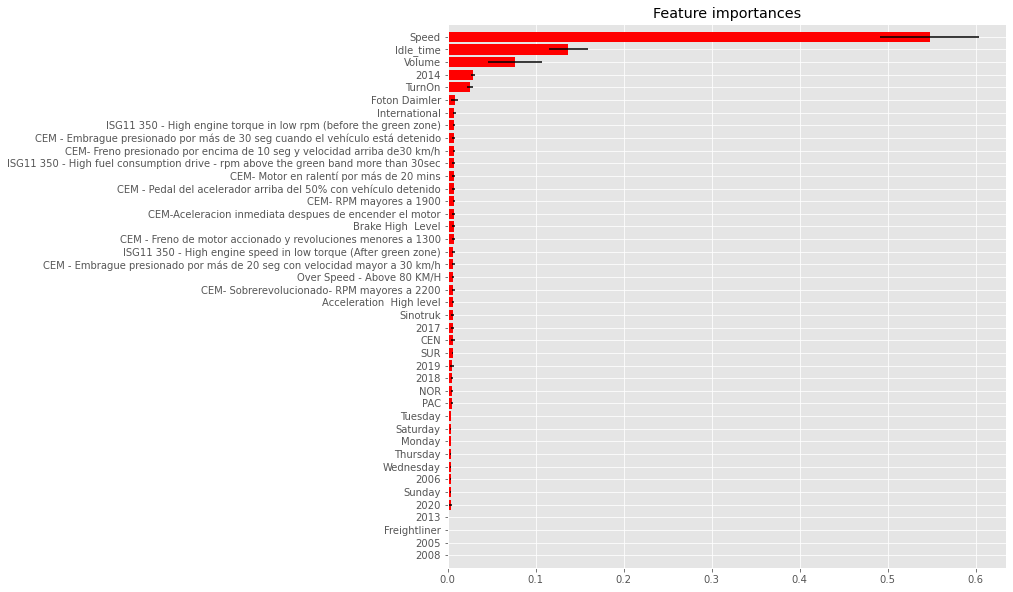

In [75]:
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(X_train.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_train.shape[1]), data_train_scale.loc[:, data_train_scale.columns != 'liters_per_hour'].columns[indices[::1]])
plt.ylim([-1, X_train.shape[1]])
plt.savefig(f'figures/feature_importances.png')
plt.show()

In [76]:
### Use RFECV with the complete data (X_train contains 36 different variables)

from sklearn.feature_selection import RFECV

min_features_to_select = 1  # Minimum number of features to consider
rfecv_RF = RFECV(estimator=best_rf, step=1, cv=5,
              scoring='r2',
              min_features_to_select=min_features_to_select)

rfecv_RF.fit(X_train, y_train)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=False, max_features='sqrt',
                                      min_samples_leaf=2, n_estimators=80,
                                      n_jobs=-1, random_state=1),
      scoring='r2')

Optimal number of features : 39


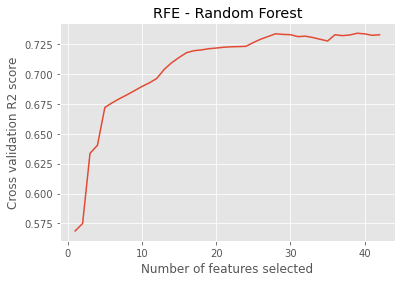

In [128]:
print("Optimal number of features : %d" % rfecv_RF.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation R2 score")
plt.plot(range(min_features_to_select,
               len(rfecv_RF.grid_scores_) + min_features_to_select),
         rfecv_RF.grid_scores_)
plt.title("RFE - Random Forest")
plt.savefig(f'figures/RFE_RF.png')
plt.show()

### It help a little bit, since it includes 39 out of 41 features in the optimal model

In [78]:
rfecv_RF.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True])

In [83]:
### Irrelevant features
data_train_scale.loc[:, data_train_scale.columns != 'liters_per_hour'].columns[[not elem for elem in rfecv_RF.support_]]

Index(['Freightliner', '2005', '2008'], dtype='object')

In [79]:
### List of relevant variables according to the RFECV analysis
### Basically it removes all weekdays and another encoded/categorical variable: Manufacturer Freightliner
data_train_scale.loc[:, data_train_scale.columns != 'liters_per_hour'].columns[rfecv_RF.support_]

Index(['TurnOn', 'Idle_time', 'Speed', 'Volume', 'Acceleration  High level',
       'Brake High  Level',
       'CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h',
       'CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido',
       'CEM - Freno de motor accionado y revoluciones menores a 1300',
       'CEM - Pedal del acelerador arriba del 50% con vehículo detenido',
       'CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h',
       'CEM- Motor en ralentí por más de 20 mins', 'CEM- RPM mayores a 1900',
       'CEM- Sobrerevolucionado- RPM mayores a 2200',
       'CEM-Aceleracion inmediata despues de encender el motor',
       'ISG11 350 - High engine speed in low torque (After green zone)',
       'ISG11 350 - High engine torque in low rpm (before the green zone)',
       'ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec',
       'Over Speed - Above 80 KM/H', 'Foton Daimler', 'Int

In [80]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.73181038 0.73381947 0.73775655 0.72958738 0.73132749]
0.7328602560124107


In [84]:
data_train_scale.loc[:, data_train_scale.columns != 'liters_per_hour'].columns[indices[::1]]

Index(['2008', '2005', 'Freightliner', '2013', '2020', 'Sunday', '2006',
       'Wednesday', 'Thursday', 'Monday', 'Saturday', 'Tuesday', 'PAC', 'NOR',
       '2018', '2019', 'SUR', 'CEN', '2017', 'Sinotruk',
       'Acceleration  High level',
       'CEM- Sobrerevolucionado- RPM mayores a 2200',
       'Over Speed - Above 80 KM/H',
       'CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h',
       'ISG11 350 - High engine speed in low torque (After green zone)',
       'CEM - Freno de motor accionado y revoluciones menores a 1300',
       'Brake High  Level',
       'CEM-Aceleracion inmediata despues de encender el motor',
       'CEM- RPM mayores a 1900',
       'CEM - Pedal del acelerador arriba del 50% con vehículo detenido',
       'CEM- Motor en ralentí por más de 20 mins',
       'ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec',
       'CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h',
       'CE

In [85]:
relevant_columns = data_train_scale.loc[:, data_train_scale.columns != 'liters_per_hour'].columns[indices[::-1]][0:30].values.tolist()
relevant_columns.append('liters_per_hour')
new_data = data[relevant_columns]
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 31 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Speed                                                                               417346 non-null  float64
 1   Idle_time                                                                           417346 non-null  float64
 2   Volume                                                                              417346 non-null  float64
 3   2014                                                                                417346 non-null  float64
 4   TurnOn                                                                              417346 non-null  int64  
 5   Foton Daimler                                                                       41

In [86]:
new_data.to_excel("dataset/data_29f_vf.xlsx",index=False)

In [87]:
import pickle

pickle.dump(new_data, open('dataset/data_12f_vf.pkl', 'wb'))

In [88]:
### Train Test split
new_data_train, new_data_test = train_test_split(new_data, test_size=0.25, random_state=42, shuffle=True)

In [89]:
numeric_cols = new_data.columns[[0,1,2,4,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]]
print(numeric_cols)

Index(['Speed', 'Idle_time', 'Volume', 'TurnOn',
       'ISG11 350 - High engine torque in low rpm (before the green zone)',
       'CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido',
       'CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h',
       'ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec',
       'CEM- Motor en ralentí por más de 20 mins',
       'CEM - Pedal del acelerador arriba del 50% con vehículo detenido',
       'CEM- RPM mayores a 1900',
       'CEM-Aceleracion inmediata despues de encender el motor',
       'Brake High  Level',
       'CEM - Freno de motor accionado y revoluciones menores a 1300',
       'ISG11 350 - High engine speed in low torque (After green zone)',
       'CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h',
       'Over Speed - Above 80 KM/H',
       'CEM- Sobrerevolucionado- RPM mayores a 2200',
       'Acceleration  High level'],
      

In [90]:
### Standarize numerical variables in Train Set
scaler = StandardScaler()
new_data_train_scale = new_data_train.copy(deep=True)
new_data_train_scale[numeric_cols] = scaler.fit_transform(new_data_train[numeric_cols].to_numpy()) 
display(new_data_train_scale.head(10))

,Speed,Idle_time,Volume,2014,TurnOn,Foton Daimler,International,ISG11 350 - High engine torque in low rpm (before the green zone),CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,...,Acceleration High level,Sinotruk,2017,CEN,SUR,2019,2018,NOR,PAC,liters_per_hour
353994,-1.371689,-1.654521,-1.443800,0.0,2.337229,0.0,1.0,-0.282732,-0.283592,-0.282549,...,-0.281748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.545455
387557,0.566357,-0.108414,-0.426594,0.0,-0.235695,0.0,1.0,-0.282732,-0.283592,-0.282549,...,-0.102384,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7.218543
373033,0.122248,1.916859,2.182759,0.0,-1.200542,0.0,0.0,0.075424,-0.283592,-0.282549,...,-0.281748,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,6.495925
410562,0.679612,-0.798412,-0.205463,0.0,-0.557311,1.0,0.0,0.075424,-0.283592,-0.282549,...,-0.281748,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,9.849057
127007,-0.562367,0.268530,0.413706,0.0,1.372382,0.0,1.0,-0.282732,0.078583,-0.282549,...,-0.281748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.094808
126900,-0.291320,-0.466191,-0.868858,0.0,-0.557311,0.0,0.0,-0.282732,0.984022,-0.282549,...,-0.281748,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.064982
103608,1.094453,-0.881467,-0.780405,0.0,0.729151,0.0,0.0,0.075424,-0.283592,-0.282549,...,-0.281748,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,9.741697
372852,-0.470746,1.124638,0.236800,0.0,-1.200542,0.0,0.0,-0.282732,-0.283592,-0.282549,...,-0.281748,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,5.817308
358561,-0.907220,0.549640,-0.249689,0.0,-0.878926,0.0,0.0,-0.282732,-0.283592,-0.282549,...,-0.281748,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,5.655172
206157,-0.841049,2.568523,2.271211,0.0,-1.200542,0.0,0.0,-0.282732,-0.283592,-0.282549,...,4.022997,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.000000


In [91]:
### Standarize numerical variables in Test Set
scaler = StandardScaler()
new_data_test_scale = new_data_test.copy(deep=True)
new_data_test_scale[numeric_cols] = scaler.fit_transform(new_data_test[numeric_cols].to_numpy()) 
display(new_data_test_scale.head(10))

,Speed,Idle_time,Volume,2014,TurnOn,Foton Daimler,International,ISG11 350 - High engine torque in low rpm (before the green zone),CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido,CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h,...,Acceleration High level,Sinotruk,2017,CEN,SUR,2019,2018,NOR,PAC,liters_per_hour
178424,0.242466,-0.744253,0.469344,0.0,0.093141,0.0,0.0,1.185504,-0.281994,-0.282691,...,-0.287242,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,10.375940
362137,1.598083,-0.468382,-0.820004,0.0,0.093141,0.0,0.0,1.736887,-0.281994,-0.282691,...,-0.287242,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,8.559740
115209,1.353690,-0.801993,-0.464322,0.0,-0.555530,0.0,0.0,-0.284853,-0.281994,-0.282691,...,-0.287242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.179641
262604,0.850903,0.493958,0.958407,0.0,-0.879865,0.0,0.0,-0.284853,-0.281994,-0.282691,...,-0.287242,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.704655
333958,-0.262867,0.891725,0.513804,0.0,0.417476,0.0,0.0,3.023449,-0.281994,-0.282691,...,-0.287242,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.007313
207469,0.102450,0.590192,0.424883,0.0,0.741812,0.0,0.0,-0.284853,-0.281994,-0.282691,...,2.255801,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,8.137432
303587,0.194097,-0.089862,-0.153100,0.0,2.363489,0.0,1.0,3.391038,-0.281994,-0.282691,...,-0.287242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.944664
69290,-1.477194,-1.674515,-1.442447,0.0,0.417476,1.0,0.0,-0.284853,-0.281994,-0.282691,...,-0.287242,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,4.615385
330112,1.484797,-0.455551,-0.686623,0.0,1.066147,0.0,1.0,0.450325,-0.281994,-0.282691,...,-0.287242,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8.552036
92383,-1.477194,0.910972,1.091787,0.0,-0.231194,0.0,1.0,-0.284853,-0.281994,3.161906,...,-0.287242,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.837446


In [92]:
new_X_train = new_data_train_scale.loc[:, new_data_train_scale.columns != 'liters_per_hour'].values
new_y_train = new_data_train_scale['liters_per_hour'].values

new_X_test = new_data_test_scale.loc[:, new_data_test_scale.columns != 'liters_per_hour'].values
new_y_test = new_data_test_scale['liters_per_hour'].values

In [93]:
new_scores_rf = cval_model(new_X_train,new_y_train,model='RandomForest',cv=True)
new_scores_gdbr = cval_model(new_X_train,new_y_train,model='GradientBoostin',cv=True)

print(f'RandomForestRegressor       Train CV    |   MSE: {round(new_scores_rf[0],3)}   |   R2: {round(new_scores_rf[1],3)}')
print(f'GradientBoostinRegressor    Train CV    |   MSE: {round(new_scores_gdbr[0],3)}  |   R2: {round(new_scores_gdbr[1],3)}')

RandomForestRegressor       Train CV    |   MSE: 1.57   |   R2: 0.718
GradientBoostinRegressor    Train CV    |   MSE: 1.641  |   R2: 0.705


In [94]:
### Adjusting Best model to answer the following questions

new_best_rf = RandomForestRegressor(n_estimators=80, n_jobs=-1, random_state=1, max_features='sqrt',
                                min_samples_leaf=2, min_samples_split=2, max_depth=None, bootstrap=False)
new_best_rf.fit(new_X_train, new_y_train)

RandomForestRegressor(bootstrap=False, max_features='sqrt', min_samples_leaf=2,
                      n_estimators=80, n_jobs=-1, random_state=1)

In [95]:
new_best_rf_y_train_pred = new_best_rf.predict(new_X_train)
new_best_rf_train_MSE_score = mean_squared_error(new_y_train, new_best_rf_y_train_pred)
print("MSE for the Best Random Forest in the Train data:", round(new_best_rf_train_MSE_score,4))
new_best_rf_train_R2_score = r2_score(new_y_train, new_best_rf_y_train_pred)
print("R2 for the Best Random Forest in the Train data:", round(best_rf_train_R2_score,4))

new_best_rf_y_test_pred = new_best_rf.predict(new_X_test)
new_best_rf_test_MSE_score = mean_squared_error(new_y_test, new_best_rf_y_test_pred)
print("MSE for the Best Random Forest in the Test data:", round(new_best_rf_test_MSE_score,4))
new_best_rf_test_R2_score = r2_score(new_y_test, new_best_rf_y_test_pred)
print("R2 for the Best Random Forest in the Test data:", round(new_best_rf_test_R2_score,4))

MSE for the Best Random Forest in the Train data: 0.4202
R2 for the Best Random Forest in the Train data: 0.9294
MSE for the Best Random Forest in the Test data: 1.5292
R2 for the Best Random Forest in the Test data: 0.728


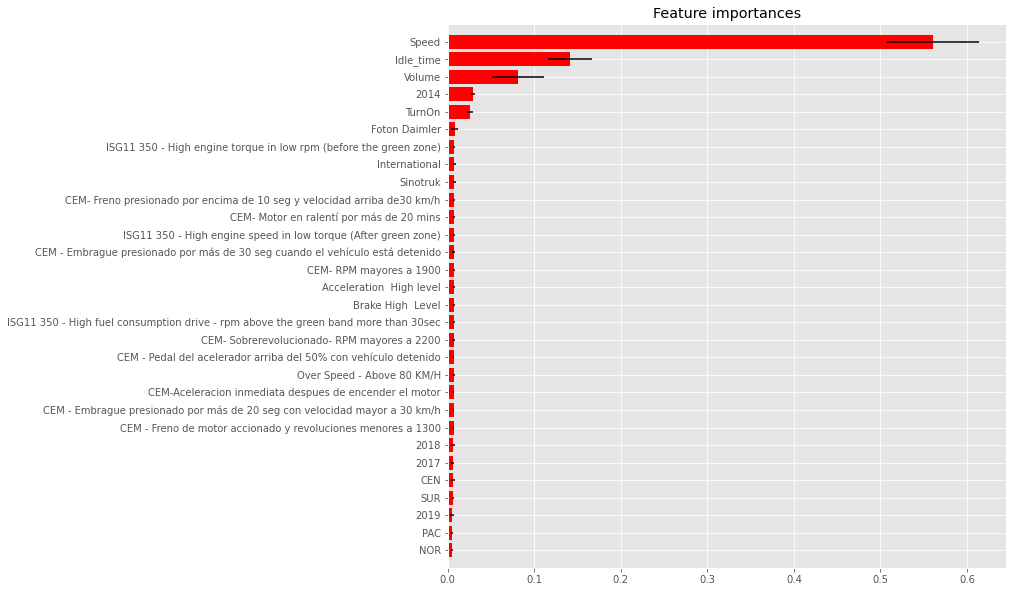

In [96]:
new_importances = new_best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in new_best_rf.estimators_],
             axis=0)
indices = np.argsort(new_importances)

# Plot the feature importances of the forest
plt.figure(figsize=(10,10))
plt.title("Feature importances")
plt.barh(range(new_X_train.shape[1]), new_importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(new_X_train.shape[1]), new_data_train_scale.loc[:, new_data_train_scale.columns != 'liters_per_hour'].columns[indices[::1]])
plt.ylim([-1, new_X_train.shape[1]])
plt.savefig(f'figures/new_feature_importances.png')
plt.show()

In [97]:
### Use RFECV with the complete data (X_train contains 36 different variables)

from sklearn.feature_selection import RFECV

min_features_to_select = 1  # Minimum number of features to consider
new_rfecv_RF = RFECV(estimator=new_best_rf, step=1, cv=5,
              scoring='r2',
              min_features_to_select=min_features_to_select)

new_rfecv_RF.fit(new_X_train, new_y_train)

RFECV(cv=5,
      estimator=RandomForestRegressor(bootstrap=False, max_features='sqrt',
                                      min_samples_leaf=2, n_estimators=80,
                                      n_jobs=-1, random_state=1),
      scoring='r2')

Optimal number of features : 28


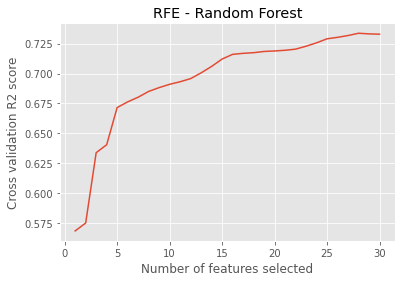

In [129]:
print("Optimal number of features : %d" % new_rfecv_RF.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation R2 score")
plt.plot(range(min_features_to_select,
               len(new_rfecv_RF.grid_scores_) + min_features_to_select),
         new_rfecv_RF.grid_scores_)
plt.title("RFE - Random Forest")
plt.savefig(f'figures/RFE_RF2.png')
plt.show()

### Is not helping a lot since it include all 28 out of 29 features in the optimal model

In [99]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(new_best_rf, new_X_train, new_y_train, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.73258395 0.73313086 0.73757541 0.72921505 0.73142977]
0.7327870069172249


In [100]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417346 entries, 0 to 417345
Data columns (total 31 columns):
 #   Column                                                                              Non-Null Count   Dtype  
---  ------                                                                              --------------   -----  
 0   Speed                                                                               417346 non-null  float64
 1   Idle_time                                                                           417346 non-null  float64
 2   Volume                                                                              417346 non-null  float64
 3   2014                                                                                417346 non-null  float64
 4   TurnOn                                                                              417346 non-null  int64  
 5   Foton Daimler                                                                       41

In [102]:
### Irrelevant features
new_data_train_scale.loc[:, new_data_train_scale.columns != 'liters_per_hour'].columns[[not elem for elem in new_rfecv_RF.support_]]

Index(['2019', 'NOR'], dtype='object')

In [101]:
new_data_train_scale.loc[:, new_data_train_scale.columns != 'liters_per_hour'].columns[new_rfecv_RF.support_]

Index(['Speed', 'Idle_time', 'Volume', '2014', 'TurnOn', 'Foton Daimler',
       'International',
       'ISG11 350 - High engine torque in low rpm (before the green zone)',
       'CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido',
       'CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h',
       'ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec',
       'CEM- Motor en ralentí por más de 20 mins',
       'CEM - Pedal del acelerador arriba del 50% con vehículo detenido',
       'CEM- RPM mayores a 1900',
       'CEM-Aceleracion inmediata despues de encender el motor',
       'Brake High  Level',
       'CEM - Freno de motor accionado y revoluciones menores a 1300',
       'ISG11 350 - High engine speed in low torque (After green zone)',
       'CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h',
       'Over Speed - Above 80 KM/H',
       'CEM- Sobrerevolucionado- RPM mayores a 

In [103]:
### Packages require to adjust Multiple Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [104]:
X2_train = sm.add_constant(X_train)
est = sm.OLS(y_train, X2_train)
est2 = est.fit()
print(est2.summary())

### I did not expect all features to be relevant according to the p-value (except for 2 or 4 features only: 29, 30, 33, 35)
### Doubt: How to interpret coefficients with non-standarized data?

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                 1.226e+04
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:47:20   Log-Likelihood:            -2.9186e+05
No. Observations:              313009   AIC:                         5.838e+05
Df Residuals:                  312966   BIC:                         5.843e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0378      0.025      1.530      0.1

In [105]:
print(data.columns)

Index(['TurnOn', 'Idle_time', 'Speed', 'liters_per_hour', 'Volume',
       'Acceleration  High level', 'Brake High  Level',
       'CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h',
       'CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido',
       'CEM - Freno de motor accionado y revoluciones menores a 1300',
       'CEM - Pedal del acelerador arriba del 50% con vehículo detenido',
       'CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h',
       'CEM- Motor en ralentí por más de 20 mins', 'CEM- RPM mayores a 1900',
       'CEM- Sobrerevolucionado- RPM mayores a 2200',
       'CEM-Aceleracion inmediata despues de encender el motor',
       'ISG11 350 - High engine speed in low torque (After green zone)',
       'ISG11 350 - High engine torque in low rpm (before the green zone)',
       'ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec',
       'Over Speed - Above 80 KM/H', 'F

In [106]:
y_train_pred_lr = est2.predict(X2_train)
lr_train_MSE_score = mean_squared_error(y_train, y_train_pred_lr)
print("MSE for the Multiple Linear Regression in the Train data:", round(lr_train_MSE_score,4))
lr_train_R2_score = r2_score(y_train, y_train_pred_lr)
print("R2 for the Multiple Linear Regression in the Train data:", round(lr_train_R2_score,4))

X2_test = sm.add_constant(X_test)
y_test_pred_lr = est2.predict(X2_test)
lr_test_MSE_score = mean_squared_error(y_test, y_test_pred_lr)
print("MSE for the Multiple Linear Regression in the Test data:", round(lr_test_MSE_score,4))
lr_test_R2_score = r2_score(y_test, y_test_pred_lr)
print("R2 for the Multiple Linear Regression in the Test data:", round(lr_test_R2_score,4))

MSE for the Multiple Linear Regression in the Train data: 0.378
R2 for the Multiple Linear Regression in the Train data: 0.622
MSE for the Multiple Linear Regression in the Test data: 0.3812
R2 for the Multiple Linear Regression in the Test data: 0.6188


In [107]:
new_X2_train = sm.add_constant(new_X_train)
new_est = sm.OLS(new_y_train, new_X2_train)
new_est2 = new_est.fit()
print(new_est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                 1.685e+04
Date:                Tue, 23 Feb 2021   Prob (F-statistic):               0.00
Time:                        16:47:34   Log-Likelihood:            -5.6219e+05
No. Observations:              313009   AIC:                         1.124e+06
Df Residuals:                  312978   BIC:                         1.125e+06
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.4827      0.058    128.525      0.0

In [108]:
print(new_data.columns)

Index(['Speed', 'Idle_time', 'Volume', '2014', 'TurnOn', 'Foton Daimler',
       'International',
       'ISG11 350 - High engine torque in low rpm (before the green zone)',
       'CEM - Embrague presionado por más de 30 seg cuando el vehículo está detenido',
       'CEM- Freno presionado por encima de 10 seg y velocidad arriba de30 km/h',
       'ISG11 350 - High fuel consumption drive - rpm above the green band more than 30sec',
       'CEM- Motor en ralentí por más de 20 mins',
       'CEM - Pedal del acelerador arriba del 50% con vehículo detenido',
       'CEM- RPM mayores a 1900',
       'CEM-Aceleracion inmediata despues de encender el motor',
       'Brake High  Level',
       'CEM - Freno de motor accionado y revoluciones menores a 1300',
       'ISG11 350 - High engine speed in low torque (After green zone)',
       'CEM - Embrague presionado por más de 20 seg con velocidad mayor a 30 km/h',
       'Over Speed - Above 80 KM/H',
       'CEM- Sobrerevolucionado- RPM mayores a 

In [109]:
new_y_train_pred_lr = new_est2.predict(new_X2_train)
new_lr_train_MSE_score = mean_squared_error(new_y_train, new_y_train_pred_lr)
print("MSE for the Multiple Linear Regression in the Train data:", round(new_lr_train_MSE_score,4))
new_lr_train_R2_score = r2_score(new_y_train, new_y_train_pred_lr)
print("R2 for the Multiple Linear Regression in the Train data:", round(new_lr_train_R2_score,4))

new_X2_test = sm.add_constant(new_X_test)
new_y_test_pred_lr = new_est2.predict(new_X2_test)
new_lr_test_MSE_score = mean_squared_error(new_y_test, new_y_test_pred_lr)
print("MSE for the Multiple Linear Regression in the Test data:", round(new_lr_test_MSE_score,4))
new_lr_test_R2_score = r2_score(new_y_test, new_y_test_pred_lr)
print("R2 for the Multiple Linear Regression in the Test data:", round(new_lr_test_R2_score,4))

MSE for the Multiple Linear Regression in the Train data: 2.1262
R2 for the Multiple Linear Regression in the Train data: 0.6177
MSE for the Multiple Linear Regression in the Test data: 2.1658
R2 for the Multiple Linear Regression in the Test data: 0.6147


## Use Variance Inflation Factor (VIF) to detect multicolinearity

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [115]:
### First VIF Analysis with all numerical variables (data)
vif_y = data['liters_per_hour']
vif_X = data.iloc[:,0:20].drop('liters_per_hour',axis=1)
vif_model = calc_vif(vif_X)
vif_model.round(1)

,Features,VIF
0,TurnOn,2.7
1,Idle_time,7.0
2,Speed,2.4
3,Volume,6.6
4,Acceleration High level,1.3
5,Brake High Level,1.3
6,CEM - Embrague presionado por más de 20 seg co...,1.3
7,CEM - Embrague presionado por más de 30 seg cu...,1.3
8,CEM - Freno de motor accionado y revoluciones ...,1.3
9,CEM - Pedal del acelerador arriba del 50% con ...,1.3


In [120]:
### Second VIF Analysis taking into account the reduce dataset (new_data)
new_vif_y = new_data['liters_per_hour']
new_vif_X = new_data.loc[:,numeric_cols]
new_vif_model = calc_vif(new_vif_X)
new_vif_model.round(1)

### This seems better, still have my doubts regarding the 'high" VIF Factor for Idle_time, Year_Model and Trips

,Features,VIF
0,Speed,2.4
1,Idle_time,7.0
2,Volume,6.6
3,TurnOn,2.7
4,ISG11 350 - High engine torque in low rpm (bef...,1.3
5,CEM - Embrague presionado por más de 30 seg cu...,1.3
6,CEM- Freno presionado por encima de 10 seg y v...,1.3
7,ISG11 350 - High fuel consumption drive - rpm ...,1.3
8,CEM- Motor en ralentí por más de 20 mins,1.3
9,CEM - Pedal del acelerador arriba del 50% con ...,1.3


## Use RFECV (Recursive Feature Elimination with Cross Validation) to detect relevant features

In [121]:
import sklearn.metrics 
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [ ]:
### Use RFECV with the complete data (X_train contains 36 different variables)

from sklearn.feature_selection import RFECV

lr = LinearRegression()

min_features_to_select = 1  # Minimum number of features to consider
rfecv_LR = RFECV(estimator=lr, step=1, cv=5,
              scoring='r2',
              min_features_to_select=min_features_to_select)

rfecv_LR.fit(X2_train, y_train)

Optimal number of features : 39


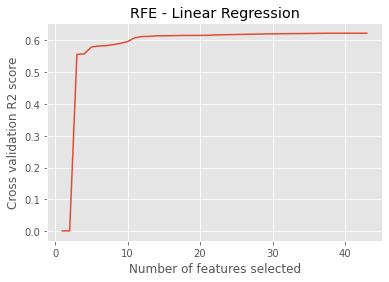

In [130]:
print("Optimal number of features : %d" % rfecv_LR.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation R2 score")
plt.plot(range(min_features_to_select,
               len(rfecv_LR.grid_scores_) + min_features_to_select),
         rfecv_LR.grid_scores_)
plt.title("RFE - Linear Regression")
plt.savefig(f'figures/RFE_LR.png')
plt.show()

### Is not helping a lot since it include 39 out of 41 features in the optimal model

In [123]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X2_train, y_train, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.62418701 0.62274882 0.62957821 0.61118997 0.62170079]
0.6218809613475251


In [124]:
### Use RFECV with the reduce data (new_X_train contains 19 different variables)

from sklearn.feature_selection import RFECV

lr = LinearRegression()

min_features_to_select = 1  # Minimum number of features to consider
new_rfecv_LR = RFECV(estimator=lr, step=1, cv=5,
              scoring='r2',
              min_features_to_select=min_features_to_select)

new_rfecv_LR.fit(new_X2_train, new_y_train)

RFECV(cv=5, estimator=LinearRegression(), scoring='r2')

Optimal number of features : 30


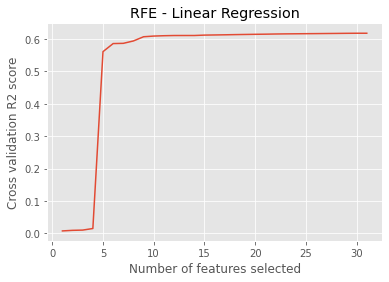

In [132]:
print("Optimal number of features : %d" % new_rfecv_LR.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation R2 score")
plt.plot(range(min_features_to_select,
               len(new_rfecv_LR.grid_scores_) + min_features_to_select),
         new_rfecv_LR.grid_scores_)
plt.title("RFE - Linear Regression")
plt.savefig(f'figures/RFE_LR2.png')
plt.show()

### Is not helping a lot since it include all 30 features in the optimal model

In [127]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, new_X2_train, new_y_train, cv=5, scoring='r2')
print(scores)
print(scores.mean())

[0.6203989  0.61816916 0.62466169 0.60725928 0.61727733]
0.6175532725625327


In [133]:
### Exporting the large models to a picke file
import pickle

pickle.dump(new_best_rf, open('dataset/RandomForest_19F.pkl', 'wb'))
pickle.dump(best_rf, open('dataset/RandomForest_36F.pkl', 'wb'))
pickle.dump(new_est2, open('dataset/LinearRegression_19F.pkl', 'wb'))
pickle.dump(est2, open('dataset/LinearRegression_36F.pkl', 'wb'))

In [134]:
### Exporting the RFE models
import pickle

pickle.dump(new_rfecv_RF, open('dataset/RandomForestRFE_19F.pkl', 'wb'))
pickle.dump(rfecv_RF, open('dataset/RandomForestRFE_36F.pkl', 'wb'))
pickle.dump(new_rfecv_LR, open('dataset/LinearRegressionRFE_19F.pkl', 'wb'))
pickle.dump(rfecv_LR, open('dataset/LinearRegressionRFE_36F.pkl', 'wb'))

In [ ]:
### Importing models from the pickle file saved previously
import pickle

loaded_model = pickle.load(open('dataset/PythonModels/RandomForest_19F.pkl', 'rb'))

In [135]:
best10cols = new_data.columns[0:9]
best10cols.append('liters_per_hour')
best10cols